This notebook contains code to build a neural network for BIOSTAT707 Final Project done by Jackson Dial

In [3]:
from tensorflow.keras import models, layers, utils, backend as K
import matplotlib.pyplot as plt
# import shap
import pandas as pd

In [4]:
#Simple model
# model = models.Sequential(name="Perceptron", layers=[
#     layers.Dense(             #a fully connected layer
#           name="dense",
#           input_dim=3,        #with 3 features as the input
#           units=1,            #and 1 node because we want 1 output
#           activation='sigmoid'
#     )
# ])
# model.summary()

Model: "Perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [4]:
#more complex model
n_features = 169
model = models.Sequential(name="DeepNN", layers=[
    ### hidden layer 1
    layers.Dense(name="h1", input_dim=n_features,
                 units=int(round((n_features+1)/2)), 
                 activation='relu'),
    layers.Dropout(name="drop1", rate=0.2),
    
    ### hidden layer 2
    layers.Dense(name="h2", units=int(round((n_features+1)/4)), 
                 activation='relu'),
    layers.Dropout(name="drop2", rate=0.2),
    
    ### layer output
    layers.Dense(name="output", units=1, activation='sigmoid')
])
model.summary()

Model: "DeepNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 85)                14450     
                                                                 
 drop1 (Dropout)             (None, 85)                0         
                                                                 
 h2 (Dense)                  (None, 42)                3612      
                                                                 
 drop2 (Dropout)             (None, 42)                0         
                                                                 
 output (Dense)              (None, 1)                 43        
                                                                 
Total params: 18,105
Trainable params: 18,105
Non-trainable params: 0
_________________________________________________________________


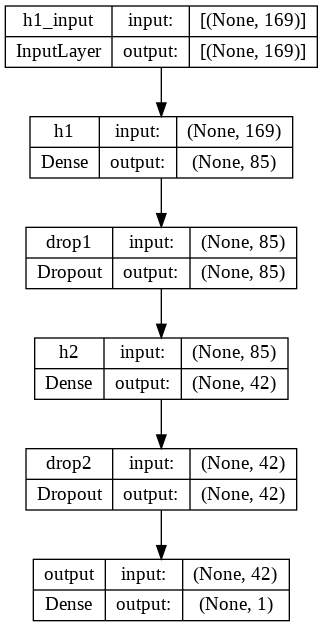

In [31]:
#try this to show the structure of the model but mine may be too complicated
utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [5]:
# define metrics
def Recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def Precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def F1(y_true, y_pred):
    precision = Precision(y_true, y_pred)
    recall = Recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the neural network
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy',F1])

In [7]:
train = pd.read_csv("train_recode.csv")
test = pd.read_csv("test_recode.csv")

In [8]:
train.head()

,Unnamed: 0,subjid,ALP_1,ALP_2,ALP_3,ALP_4,ALT_1,ALT_2,ALT_3,ALT_4,...,pH_4,height_cleaned_1,height_cleaned_2,height_cleaned_3,height_cleaned_4,MechVent_cleaned_1,MechVent_cleaned_2,MechVent_cleaned_3,MechVent_cleaned_4,In.hospital_death
0,1,132547,NaN,101.0,101.0,101.0,45.000000,47.647059,60.0,60.0,...,7.448125,180.3,180.3,180.3,180.3,1.0,1.00,1.0,1.0,0
1,2,132551,47.0,47.0,47.0,47.0,46.000000,46.000000,46.0,46.0,...,7.343333,162.6,162.6,162.6,162.6,0.0,0.68,1.0,1.0,1
2,3,132567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.410000,157.5,157.5,157.5,157.5,1.0,1.00,1.0,1.0,0
3,4,132599,116.0,112.0,112.0,112.0,13.133333,13.000000,13.0,13.0,...,7.465625,177.8,177.8,177.8,177.8,1.0,1.00,1.0,1.0,0
4,5,132601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.420000,177.8,177.8,177.8,177.8,1.0,1.00,1.0,1.0,0


In [9]:
train.shape

(1270, 171)

In [10]:
#Replace NaN values with -1
train_neg1 = train.fillna(-1)

In [11]:
train_x = train_neg1.drop(["subjid", "In.hospital_death"], axis=1)
train_y = train_neg1["In.hospital_death"]

In [12]:
train_x.isnull().any()

Unnamed: 0            False
ALP_1                 False
ALP_2                 False
ALP_3                 False
ALP_4                 False
                      ...  
height_cleaned_4      False
MechVent_cleaned_1    False
MechVent_cleaned_2    False
MechVent_cleaned_3    False
MechVent_cleaned_4    False
Length: 169, dtype: bool

In [13]:
train_x.shape
train_x.head()

,Unnamed: 0,ALP_1,ALP_2,ALP_3,ALP_4,ALT_1,ALT_2,ALT_3,ALT_4,AST_1,...,pH_3,pH_4,height_cleaned_1,height_cleaned_2,height_cleaned_3,height_cleaned_4,MechVent_cleaned_1,MechVent_cleaned_2,MechVent_cleaned_3,MechVent_cleaned_4
0,1,-1.0,101.0,101.0,101.0,45.000000,47.647059,60.0,60.0,47.0,...,7.426667,7.448125,180.3,180.3,180.3,180.3,1.0,1.00,1.0,1.0
1,2,47.0,47.0,47.0,47.0,46.000000,46.000000,46.0,46.0,82.0,...,7.267727,7.343333,162.6,162.6,162.6,162.6,0.0,0.68,1.0,1.0
2,3,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.0,...,7.410000,7.410000,157.5,157.5,157.5,157.5,1.0,1.00,1.0,1.0
3,4,116.0,112.0,112.0,112.0,13.133333,13.000000,13.0,13.0,19.4,...,7.505625,7.465625,177.8,177.8,177.8,177.8,1.0,1.00,1.0,1.0
4,5,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.0,...,7.400714,7.420000,177.8,177.8,177.8,177.8,1.0,1.00,1.0,1.0


In [14]:
model.fit(x = train_x, y = train_y, epochs = 100, validation_split = .3, verbose = 1)

Epoch 1/100
28/28 [==============================] - 2s 14ms/step - loss: 11.1089 - accuracy: 0.7717 - F1: 0.1950 - val_loss: 5.3811 - val_accuracy: 0.8084 - val_F1: 0.2312
Epoch 2/100
28/28 [==============================] - 0s 4ms/step - loss: 5.1915 - accuracy: 0.7908 - F1: 0.1903 - val_loss: 2.5957 - val_accuracy: 0.8478 - val_F1: 0.2569
Epoch 3/100
28/28 [==============================] - 0s 4ms/step - loss: 2.6582 - accuracy: 0.8076 - F1: 0.3095 - val_loss: 1.8854 - val_accuracy: 0.7559 - val_F1: 0.2695
Epoch 4/100
28/28 [==============================] - 0s 4ms/step - loss: 3.3641 - accuracy: 0.7863 - F1: 0.2465 - val_loss: 1.3369 - val_accuracy: 0.8084 - val_F1: 0.1885
Epoch 5/100
28/28 [==============================] - 0s 5ms/step - loss: 3.5023 - accuracy: 0.7874 - F1: 0.2528 - val_loss: 0.8503 - val_accuracy: 0.7428 - val_F1: 0.2284
Epoch 6/100
28/28 [==============================] - 0s 5ms/step - loss: 1.7592 - accuracy: 0.7942 - F1: 0.2516 - val_loss: 0.8894 - val_accura

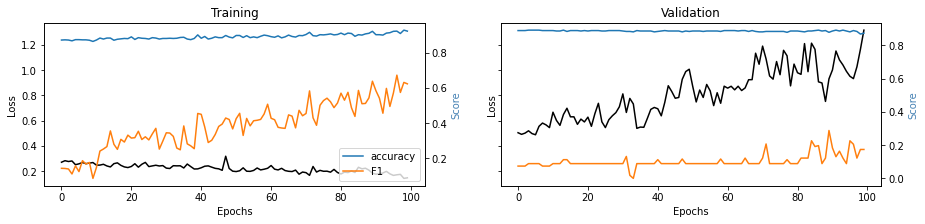

In [15]:
# train/validation
training = model.fit(x=train_x, y=train_y, batch_size=32, epochs=100, shuffle=True, verbose=0, validation_split=0.3)

# plot
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]    
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))
       
## training    
ax[0].set(title="Training")    
ax11 = ax[0].twinx()    
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')    
ax[0].set_ylabel('Loss', color='black')    
for metric in metrics:        
    ax11.plot(training.history[metric], label=metric)
    ax11.set_ylabel("Score", color='steelblue')    
ax11.legend()
        
## validation    
ax[1].set(title="Validation")    
ax22 = ax[1].twinx()    
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')    
ax[1].set_ylabel('Loss', color='black')    
for metric in metrics:          
    ax22.plot(training.history['val_'+metric], label=metric)
    ax22.set_ylabel("Score", color="steelblue")    
plt.show()

In [16]:
training.history

{'loss': [0.27139973640441895,
  0.2834368646144867,
  0.2770499289035797,
  0.2813389003276825,
  0.2519002854824066,
  0.25863513350486755,
  0.26912862062454224,
  0.2601296007633209,
  0.2644602358341217,
  0.2687973380088806,
  0.2483329027891159,
  0.2486688494682312,
  0.255112886428833,
  0.24196596443653107,
  0.23404566943645477,
  0.2599391043186188,
  0.26643112301826477,
  0.24651962518692017,
  0.23426151275634766,
  0.22917775809764862,
  0.23774144053459167,
  0.2595745623111725,
  0.23218469321727753,
  0.25535520911216736,
  0.2701616585254669,
  0.2367788851261139,
  0.24233287572860718,
  0.24750889837741852,
  0.2416633665561676,
  0.24475660920143127,
  0.2247779369354248,
  0.22177566587924957,
  0.24386785924434662,
  0.24271132051944733,
  0.24326162040233612,
  0.22582435607910156,
  0.25704726576805115,
  0.236822247505188,
  0.21779438853263855,
  0.21871821582317352,
  0.22761255502700806,
  0.23980358242988586,
  0.24248479306697845,
  0.2324179857969284,


# Round 2